# TP2: Support Vector Machines

*By Daniel Deutsch and Kevin Kühl*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1

In [2]:
def load_breastcancer(filename):
    data = np.loadtxt(filename, delimiter=',')

    # The column 0 isn't important for us here
    y = data[:, 1]*2 - 1
    X = data[:, 2:]

    # Standardisation of the matrix
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y

In [3]:
X, y = load_breastcancer("./datasets/wdbc_M1_B0.data")

# Exercise 2.1

From the proposed initial problem, we have (considering c = 1)

<br>

\begin{aligned}
f(v, a, \xi) = \frac{1}{2} \sum_j v_j^2 + \sum_i \xi_i
\end{aligned}

<br>

Observing the above function, we see that it is a increasing with $\xi_i$, $\forall i$ and $v_j$, $\forall j$.

Looking at the constraints of the original problem, we see that $\forall i$, $\xi_i$ must be greater or equal to zero and also greater or equal to $1 - y_i(x_i^Tv + a)$.

Therefore, we define a new $\xi_min \in \mathbb{R}^n$ as 

<br>

\begin{aligned}
\xi_{min_i} = max(0, 1 - y_i(x_i^Tv + a))
\end{aligned}

<br>

It stores the minimum value of $\xi_i, \forall i$.

Therefore, upon the considerations of a increasing function made above

<br>

\begin{aligned}
f(v, a, \xi) \ge f(v, a, \xi_{min}).
\end{aligned}

<br>

And, therefore

<br>

\begin{aligned}
min_{v,a,\xi} f(v,a,\xi) \ge min_{v,a,\xi} f(v, a, \xi_{min}) = min_{v,a} f(v, a, \xi_{min})
\end{aligned}

<br>

Besides, if we consider a function $g(x,y)$ which accepts a minimum, $\forall y_0 \in Y$ we have

<br>

\begin{aligned}
min_{x\in X, y \in Y} g(x,y) \le min_{x \in X} g(x,y_0)
\end{aligned}

Analogally,

<br>

\begin{aligned}
min_{v,a,\xi} f(v,a,\xi) \le min_{v,a} f(v, a, \xi_{min})
\end{aligned}

<br>

Using both inequalities, we can finally write

<br>

\begin{aligned}
min_{v,a,\xi} f(v,a,\xi) = min_{v,a} f(v, a, \xi_{min})
\end{aligned}

<br>

Which proves the equivalence.

# Exercise 2.2

Let's plot the function and the straight lines in between both existing gradients.

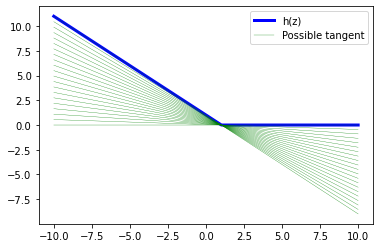

In [4]:
def h(z):
    return np.maximum(np.zeros(z.shape), 1-z)

z = np.arange(-10, 10, 0.01)

plt.plot(z, h(z), color='blue', linewidth=3.0)
for j in range(21):
    slope = -j/20
    ords = (z-1)*slope
    plt.plot(z, ords, color='green', linewidth=0.3)
    
plt.legend(["h(z)", "Possible tangent"])
plt.show()

We see that h(z) is derivable for all z different from 1. Therefore, if $z \neq$ 1

<br>

\begin{aligned}
    \partial h(z) = \frac{dh(z)}{dz}
\end{aligned}

For z = 1, we have (by looking at the above plot) that all the slopes are in between -1 and 0, therefore 


\begin{aligned}
    \partial h(z) = 
    \begin{cases}
        \{-1\} & if \ z \lt 1 \\
        [-1;0] & if \ z = 1 \\
        \{0\} & if \ z \gt 1 \\
    \end{cases}
\end{aligned}

# Exercise 2.3

We first rewrite $f(v,a)$:

<br>

\begin{aligned}
    f(v, a) = \frac{1}{2}\cdotp\sum_{j=1}^{m} v^2_j + c\cdotp\sum_{i=1}^{n}max(0,1-y_i(x_i^Tv+a))
\end{aligned}

<br>

Our goal is to find N and H separable such that we can write:

<br>

\begin{aligned}
    f(v, a) = N(v, a) + c\cdotp H(M(v, a))
\end{aligned}

$N(v,a)$ is relatively easy to find, as we can write : 

<br>

\begin{aligned}
    N(v, a) = \sum_{j=1}^{m} h_j $ with $ h_j(v) = \frac{1}{2}v_j^2
\end{aligned}

<br>

Noting that it is, by construction, a separable function.

Now, when searching for $H(v, a)$ and $M(v, a)$, we know that

<br>
\begin{aligned}
    H(v, a)\cdotp M(v, a) = \sum_{i=1}^{n}max(0, 1-y_i(x_i^Tv+a))
\end{aligned}
<br>

To build M, we take a diagonal matrix D with all the elements $y_i$

<br>

\begin{aligned}
    D = \begin{pmatrix}
    y_1 & ... & 0 \\
    ... & ... & ...\\
    0 & ... & y_n
    \end{pmatrix}
\end{aligned}

<br>

Then, we create another matrix L, composed by the observations $x_i^T$ and complemented with a column of ones.

<br>

\begin{aligned}
    L= \begin{pmatrix}
    x_1^T & 1 \\
    ... & ...\\
    x_n^T & 1
    \end{pmatrix}
\end{aligned}

<br>

Finally, we can write M as $M = D\cdotp L$, and

<br>

\begin{aligned}
M(v, a) = M \cdotp \begin{pmatrix} v\\a\end{pmatrix}
\end{aligned}

<br>

Also we write H as $H = \sum_{i=1}^{n}h_i $, where $ h_i(W) = max(0, 1-w_i)$  for vector a $W$. Note that H is, also by construction, separable and W is the product of $M$ and $\begin{pmatrix}v\\a\end{pmatrix}$, yielding $M(v, a)$.

# Exercise 2.4

In [5]:
X = np.insert(X, X.shape[1], 1, axis=1)

In [6]:
# Function to return randomly the subgradient of h taken at a given point
def H_subgradient(z):
    return (z<1)*(-1) + (np.random.rand(1)[0]-1)*(z==1)

# Defining function f from the matrices and transformations found above
def f(v, a): 
    v_sum = 1/2*sum([v[j]**2 for j in range(len(v))])
    
    # Matrix D
    D = np.diag(y)

    # Matrix M
    M = np.dot(X.transpose(), D)
    
    # Matrix M(v,a)
    M_v_a = np.dot(M.transpose(), np.concatenate((v, [a]), axis=0))
    
    # Finally computing the second term
    c_sum = sum([max(0, 1-M_v_a[i]) for i in range(len(M_v_a))])
    
    # Adding with the first term and returning
    return v_sum + c_sum

# Finally computing the gradient of f(v,a)
def subgradient(v, a):
    # Compute the subgradient of the first part of the function
    N_subgrad = np.concatenate((v, [0]), axis=0)
    
    # Defining matrices like in previous function 
    D = np.diag(y)
    M = np.dot(D, X)
    M_v_a = np.dot(M,np.concatenate((v, [a]), axis=0))
    
    # Use previous defined function to find the subgradient of the second part of the function f
    H_subgrad = np.array([H_subgradient(z) for z in M_v_a])
    
    # Multiplying it by the matrix M (transpose)
    multiplied_H_subgrad = np.dot(M.T, H_subgrad)
    
    # Returning the final result for the subgradient of f(v, a)
    return N_subgrad + multiplied_H_subgrad

In [7]:
v = np.ones(30)
f(v, 1)

603.8252882581148

In [8]:
subgradient(v, 1)

array([-38.73829648, -20.70475549, -34.49379607, -34.9876155 ,
        38.59618269,  45.35166232,  23.55585667,   1.95675574,
        36.5927392 ,  89.42902745,  -6.13062046,  28.6170554 ,
         0.18689247, -13.53182243,  59.92957203,  84.51089819,
        72.68924277,  60.05022852,  41.47511889,  99.88454603,
       -39.4982886 , -27.61455329, -34.31830559, -34.37001474,
        18.65124737,  28.15298039,  20.26382933,  -2.07793185,
        -2.28514378,  55.68259705,  26.        ])

# Exercise 2.5

In [9]:
def subgradient_method(v0, a0, epsilon=1, itmax=10000):
    gk = subgradient(v0, a0)
    xk = np.zeros(31)
    itr = 0
    while(np.linalg.norm(gk) > epsilon and itr <= itmax): 
        xk -= 1/(itr+1)*gk
        gk = subgradient(xk[:-1], xk[-1])
        print(f"\rCurrent iteration: {itr}/{itmax}", end="")
        itr += 1
    return xk

In [10]:
v0 = np.zeros(30)
x_min = subgradient_method(v0, 0)
print(f"\rThe subgradient method gives a mininumum of: {f(x_min[:-1], x_min[-1]):.4f}, given the initial conditions (v0, a0) = 0")

The subgradient method gives a mininumum of: 26.5638, given the initial conditions (v0, a0) = 0


# Exercise 3.1

We have that:

<br>

\begin{aligned}
    E[f_I (v, a)] \quad & = \quad \sum_{i = 1}^n P(I = i) \ f_i (v, a) \\
    & = \quad \frac{1}{n} \sum_{i = 1}^n f_i (v, a) \\
    & = \quad \frac{1}{n} \sum_{i = 1}^n \left(c \ n \ max(0, \ 1-y_i(x_i^T v + a)) + \frac{1}{2} \sum_{j = 1}^m v_j^2 \right) \\
    & = \quad \frac{1}{n} \sum_{i = 1}^n (c \ n \ max(0, \ 1-y_i(x_i^T v + a))) + \frac{1}{n} \sum_{i = 1}^n \frac{1}{2} \sum_{j = 1}^m v_j^2 \\
    & = \quad \sum_{i = 1}^n (c \ max(0, \ 1-y_i(x_i^T v + a))) + \frac{1}{2} \sum_{j = 1}^m v_j^2 \\
    & = \quad f(v, a)
\end{aligned}

# Exercise 3.2

Let $M_i$ be the $i_th$ row of $M$, i.e. $M_i = y_i(x_i^T, 1)$. This way, we have:

<br>

\begin{aligned}
    M_i\begin{pmatrix} v \\ a \end{pmatrix} \quad = \quad y_i(x_i^Tv + a)
\end{aligned}

<br>

Therefore, we can write $f_i(v, a) = N(v, a) + c \ n \ h(M_i(v,a))$, which implies $\partial f_i(v, a) = (v, 0) + c \ n \ M_i^T \ \partial h(M_i(v, a))$. Thus, we have:

<br>

\begin{aligned}
    \partial f_i(v, a) =
    \begin{cases}
        (v, 0) - n \ c \ M_i^T & if \ M_i(v, a) \lt 1 \\
        (v, 0) + t \ n \ c \ M_i^t, \quad t \in [-1; 0] & if \ M_i(v, a) = 1 \\
        (v, 0) & if \ M_i(v, a) \gt 1
    \end{cases}
\end{aligned}

# Exercise 3.3

In [11]:
def delta_h_M_i(va, i):
    return ((np.dot(M[i,:], va)>=1)- 1) * M[i,:]

def delta_f_i(va, i):
    return np.concatenate([va[:-1], [0]]) + c * M.shape[0] * delta_h_M_i(va,i)

def stochastic_subgradient_method(va0, N):
    n = M.shape[0]
    va_mean = np.zeros(va0.shape)
    gamma_sum = 0
    
    for i in range(N):
        I = np.random.randint(n)
        gamma = 0.001/np.sqrt(i+1)
        gamma_sum += gamma
        va_mean += va0 * gamma
        
        va0 = va0 - gamma * delta_f_i(va0,I)
    
    #return va0
    return va_mean/gamma_sum

In [14]:
c = 1
M = np.dot(np.diag(y), np.concatenate([X, np.ones((569,1))], axis = 1))
va0 = np.zeros((32,))
va_1 = stochastic_subgradient_method(va0, 100000)

def N(va):
    return 0.5 * np.sum(va[:-1]**2)

def H_M(va):
    return np.sum(h(np.dot(M,va)))

# Creates an f2 function that allows us to use va instead of v and a
def f2(va):
    return N(va) + c * H_M(va)

print(f"\rThe subgradient method gives a mininumum of: {f2(va_1):.4f}, given the initial conditions (v0, a0) = 0")

The subgradient method gives a mininumum of: 30.5703, given the initial conditions (v0, a0) = 0


# Exercise 4.1

The Lagrangian function $L(v, a, \phi, \psi)$ associated to Problem (1) is:

<br>

\begin{aligned}
    L(v, a, \phi, \psi) \quad = \quad \frac{1}{2} \sum_{j=1}^{m} v_j^2 +c\sum_{i=1}^{n}\xi_i-\sum_{i=1}^{n}\langle \phi_i, \xi_i\rangle - \sum_{i=1}^{n}\langle \psi_i, 1 - \xi_i - y_i(x_i^Tv+a)\rangle + \tau_{\mathbb{R_{+}^{n}}}(\psi) + \tau_{\mathbb{R_{+}^{n}}}(\phi)
\end{aligned}

# Exercise 4.2

We have $g(x, \phi) = - \frac{1}{2\rho} \phi^2 + \frac{\rho}{2} (max(0, \ x + \rho^{-1} \phi))^2$ with $\rho > 0$. Firstly, to find $\nabla_x g(x, \phi)$, we do:

<br>

\begin{aligned}
    \nabla_x g(x, \phi) \quad = \quad \frac{\partial g(x, \phi)}{\partial x} \quad & = \quad \frac{\partial \left(-\frac{1}{2\rho} \phi^2\right)}{\partial x} + \frac{\partial \left(\frac{\rho}{2} (max(0, \ x + \rho^{-1} \phi))^2\right)}{\partial x} \\
    & = \quad 0 + \frac{2 \rho}{2} (max(0, \ x + \rho^{-1} \phi)) \\
    & = \quad \rho \ max(0, \ x + \rho^{-1} \phi)
\end{aligned}

<br>

Now, to find $\nabla_\phi g(x, \phi)$:

<br>

\begin{aligned}
    \nabla_\phi g(x, \phi) \quad = \quad \frac{\partial g(x, \phi)}{\partial \phi} \quad & = \quad \frac{\partial \left(-\frac{1}{2\rho} \phi^2\right)}{\partial \phi} + \frac{\partial \left(\frac{\rho}{2} (max(0, \ x + \rho^{-1} \phi))^2\right)}{\partial \phi} \\
    & = \quad -\frac{2}{2\rho} \phi + \frac{2 \rho}{2 \rho} (max(0, \ x +\rho^{-1} \phi)) \\
    & = \quad -\frac{\phi}{\rho} + max(0, \ x + \rho^{-1} \phi) \\
    & = \quad max(-\rho^{-1} \phi, \ x)
\end{aligned}


# Exercise 4.3

From *Exercise 4.2* we know that $\frac{\partial g(x, \phi)}{\partial x} = \rho \ max(0, \ x + \rho^{-1} \phi)$ and that $\frac{\partial g(x, \phi)}{\partial \phi} = max(-\rho^{-1} \phi, \ x)$. 

To categorize the function $x \rightarrow g(x, \phi)$ as concave or convexe, all we need to do is verify the signal of $\frac{\partial^2 g(x, \phi)}{\partial x^2}$:

<br>

\begin{aligned}
    \frac{\partial^2 g(x, \phi)}{\partial x^2} \quad & = \quad \frac{\partial (\rho \ max(0, \ x + \rho^{-1} \phi))}{\partial x} \\
    & = \quad \rho \ max(0, 1) \\
    & = \quad \rho
\end{aligned}

<br>

Since by definition we have that $\rho > 0$, we confirm that the function $x \rightarrow g(x, \phi)$ is convex.

Similarly, for the function $\phi \rightarrow g(x, \phi)$, we analyse the signal of $\frac{\partial^2 g(x, \phi)}{\partial \phi^2}$:

<br>

\begin{aligned}
    \frac{\partial^2 g(x, \phi)}{\partial \phi^2} \quad & = \quad \frac{\partial (max(-\rho^{-1} \phi, \ x))}{\partial \phi} \\
    & = \quad \ max(-\rho^{-1}, 0) \\
    & = \quad 0
\end{aligned}

<br>

Since the Hessian of $\phi \rightarrow g(x, \phi)$ is $\leq 0$, the function is concave.

# Exercise 4.4

In [15]:
rho = 2
def g(x,phi):
    return (-1/(2*rho))*(phi**2) + (rho/2)*(max(0,x + rho**-1*phi))**2

def nabla_x_g(x, phi):
    return rho * np.maximum(np.zeros(x.shape), x + phi/rho)

def nabla_phi_g(x, phi):
    return np.maximum(-phi/rho, x)


def lagrangian_minimizer(phi, psi):
    # Initial conditions
    
    v = np.zeros((31,))
    a = 0
    xi = np.zeros((569,))
    
    dv = np.zeros((31,))
    da = 1.5
    dxi = np.zeros((569,))
    
    while np.sum(dv**2)+da**2+np.sum(dxi**2)>1:
        x = 1-xi-np.dot(np.diag(y), np.dot(X, v) + a)
        
        # Calculating the gradients
        dv = v - np.dot(np.dot(np.diag(y), X).T, nabla_x_g(x, psi))
        da = -np.sum(y * nabla_x_g(x,psi))
        dxi = c - nabla_x_g(-xi, phi) - nabla_x_g(x, psi)
        
        # We fixed we gamma instead of line search
        gamma = 1E-3
        v -= gamma * dv
        a -= gamma * da
        xi -= gamma * dxi
        
    return v, a, xi

# Exercise 4.5

In [16]:
# Computing the gradient of the lagragian with respect to phi and psi
def nabla_phi_L(v,a,xi,phi,psi):
    return nabla_phi_g(-xi, phi)

def nabla_psi_L(v,a,xi,phi,psi):
    x = 1-xi-np.dot(np.diag(y), np.dot(X, v) + a)
    return nabla_phi_g(x, psi)

# Exercise 4.6

In [17]:
# Finally writing the lagrangian augmented problem
def lagr_aug_method(N):
    phi = 0
    psi = 0
    
    for i in range(N):
        v,a,xi = lagrangian_minimizer(phi,psi)
        phi += rho * nabla_phi_g(-xi, phi)
        x = 1-xi-np.dot(np.diag(y), np.dot(X, v) + a)
        psi += rho * nabla_phi_g(x, psi)
    return v,a,xi

In [20]:
c = 1
v,a,xi = lagr_aug_method(2000)

In [21]:
third_term = 0
for i in range(569):
    third_term += g(-xi[i],0)

fourth_term = 0
for i in range(569):
    fourth_term += g(-xi[i] + 1 - y[i]*(X[i].dot(v) + a), 0)
    
def f(v,xi):
    return 1/2 * np.sum(v**2) + c * np.sum(xi) + third_term + fourth_term
f(v,xi)

26.968494717664893

# Exercise 5.1

Regarding the three worked out algorithms we can see that each one offers some benefits at the same time as some drawbacks. For the simple gradient descent algorithm, it is precise and can be adapted to small error tolerances, but it requires the computation of gradients (or sub-gradients in the case of non-differentiable functions) a significant amount of times. If one can accept slightly more imprecise results, the stochastic gradient descent offers reasonably fast computations (which can be performed multiple times to improve precision). Finally, the most precise method is the Augmented Lagrangian Method, but to profit from its precision one have to trade in computation performance, as the method demands a lot of computational time and resources.